In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
data= pd.read_csv('mnist_train.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X=data.iloc[:,1:].to_numpy()
Y=data.iloc[:,0].to_numpy()
print(f'{X[0].shape} shape of X, {Y[0].shape} Shape of y')

(784,) shape of X, () Shape of y


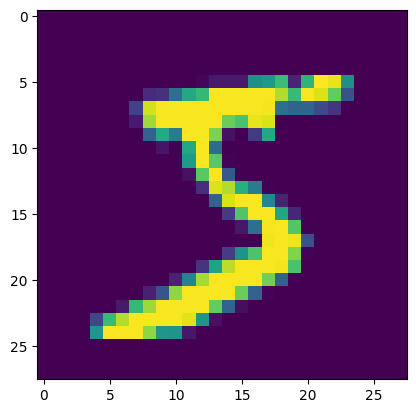

In [ ]:
plt.imshow(X[0].reshape(28,28))

In [ ]:
#weight initialisation

#hidden layer 28

W_hidden=np.random.rand(28,784)
b_hidden=np.random.rand(28)


#output layer
W_output=np.random.rand(10,28)
b_output=np.random.rand(10)


print(f"{W_hidden.shape} {b_hidden.shape}  hidden layer weigth, {W_output.shape, b_output.shape} output layer weight")


(28, 784) (28,)  hidden layer weigth, ((10, 28), (10,)) output layer weight


In [ ]:
X_train=X[:1000]
Y_train=Y[:1000]

In [ ]:
def hiddenLayerCompute(X,W_hidden,b_hidden,neuron=0):
  answer=np.zeros(28)
  for i in range(28):
    z=np.dot(W_hidden[i],X)+b_hidden[i]
    answer[i]=max(0,z)
  return answer

def outputLayerCompute(X, W_output, b_output):
  z=np.zeros(10)

  for i in range(10):
    z[i] = np.dot(X, W_output[i]) + b_output[i]

  # Softmax activation
  exp_z = np.exp(z - np.max(z))
  softmax_output = exp_z / np.sum(exp_z)

  return softmax_output



In [ ]:
def cross_entropy_loss(y_true, y_pred):
    """
    Compute the cross-entropy loss between the true labels and predicted probabilities.

    Args:
    - y_true: Array of true labels (one-hot encoded).
    - y_pred: Array of predicted probabilities (output of softmax layer).

    Returns:
    - loss: Scalar value representing the cross-entropy loss.
    """


    # Avoid numerical instability by clipping values close to 0 or 1
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # Compute cross-entropy loss
    loss = -np.sum(y_true * np.log(y_pred))

    return loss

In [ ]:
def Forward(X,W_hidden,W_output,b_hidden,b_output):
  return outputLayerCompute(hiddenLayerCompute(X[0],W_hidden,b_hidden),W_output,b_output)


In [ ]:
Forward(X_train,W_hidden,W_output,b_hidden,b_output)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
Y_train=Y_train.reshape(1000,1)


Y_train=OneHotEncoder().fit_transform(Y_train).toarray()

In [ ]:
type(Y_train[0])

numpy.ndarray

In [ ]:
cross_entropy_loss(Y_train[0],Forward(X_train,W_hidden,W_output,b_hidden,b_output))

34538.77639491069